In [6]:
!pip install wordcloud
import matplotlib.pyplot as plt
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import download
download('stopwords')
download('wordnet')
from nltk.corpus import stopwords
from wordcloud import WordCloud
import json
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /home/lokesh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/lokesh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:
df=pd.read_csv('emails.csv')
df.head(-1)

text spam Unnamed: 2  \
0     Subject: naturally irresistible your corporate...    1        NaN   
1     Subject: the stock trading gunslinger  fanny i...    1        NaN   
2     Subject: unbelievable new homes made easy  im ...    1        NaN   
3     Subject: 4 color printing special  request add...    1        NaN   
4     Subject: do not have money , get software cds ...    1        NaN   
...                                                 ...  ...        ...   
5722  Subject: re : vacation  vince :  i just found ...    0        NaN   
5723  Subject: re : research and development charges...    0        NaN   
5724  Subject: re : receipts from visit  jim ,  than...    0        NaN   
5725  Subject: re : enron case study update  wow ! a...    0        NaN   
5726  Subject: re : interest  david ,  please , call...    0        NaN   

      Unnamed: 3  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
...          ...  
5722         NaN  
5723         NaN  
5724         NaN  
5725         NaN  
5726         NaN  

[5727 rows x 4 columns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   text        5728 non-null   object 
 1   spam        5728 non-null   object 
 2   Unnamed: 2  9 non-null      object 
 3   Unnamed: 3  4 non-null      float64
dtypes: float64(1), object(3)
memory usage: 179.1+ KB


In [10]:
df['text'].head(10)

0    Subject: naturally irresistible your corporate...
1    Subject: the stock trading gunslinger  fanny i...
2    Subject: unbelievable new homes made easy  im ...
3    Subject: 4 color printing special  request add...
4    Subject: do not have money , get software cds ...
5    Subject: great nnews  hello , welcome to medzo...
6    Subject: here ' s a hot play in motion  homela...
7    Subject: save your money buy getting this thin...
8    Subject: undeliverable : home based business f...
9    Subject: save your money buy getting this thin...
Name: text, dtype: object

In [11]:
df['text']=df['text'].map(lambda x: re.sub(r'[^a-zA-Z]',' ',str(x)))
df=df.dropna(subset=['text'])
df.head()

text spam Unnamed: 2  \
0  Subject  naturally irresistible your corporate...    1        NaN   
1  Subject  the stock trading gunslinger  fanny i...    1        NaN   
2  Subject  unbelievable new homes made easy  im ...    1        NaN   
3  Subject    color printing special  request add...    1        NaN   
4  Subject  do not have money   get software cds ...    1        NaN   

   Unnamed: 3  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN

In [15]:
stop=stopwords.words("english")

In [16]:
def remove_encoding_word(word):
    word=str(word)
    word=word.encode("ASCII","ignore").decode("ASCII")
    return word

In [17]:
def remove_encoding_text(text):
    text=str(text)
    text=' '.join(remove_encoding_word(word) for word in text.split() if word not in stop)
    return text

In [18]:
df['text']=df['text'].apply(remove_encoding_text)

In [19]:
lemma=WordNetLemmatizer().lemmatize

In [20]:
def tokenize(documents):
    tokens=[lemma(w) for w in documents.split() if len(w)>3 and w.isalpha()]
    return tokens

In [21]:
vectorizer=TfidfVectorizer(tokenizer=tokenize,ngram_range=((2,2)),stop_words=stop,strip_accents='unicode')

In [22]:
tok=vectorizer.fit_transform(df['text'])

/home/lokesh/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['doe'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [23]:
vectorizer.vocabulary_.items()

dict_items([('subject naturally', 247019), ('naturally irresistible', 166423), ('irresistible corporate', 129517), ('corporate identity', 53840), ('identity really', 118324), ('really hard', 206221), ('hard recollect', 110326), ('recollect company', 207718), ('company market', 45306), ('market full', 152315), ('full suqgestions', 100490), ('suqgestions information', 250473), ('information isoverwhelminq', 123467), ('isoverwhelminq good', 129622), ('good catchy', 105369), ('catchy logo', 35435), ('logo stylish', 144958), ('stylish statlonery', 245970), ('statlonery outstanding', 242266), ('outstanding website', 178175), ('website make', 278251), ('make task', 149484), ('task much', 253918), ('much easier', 164556), ('easier promise', 74278), ('promise havinq', 199525), ('havinq ordered', 110625), ('ordered iogo', 176756), ('iogo company', 129296), ('company automaticaily', 44895), ('automaticaily become', 19733), ('become world', 23669), ('world ieader', 284258), ('ieader isguite', 1183

In [38]:
tfidf_weights=[(word,tok.getcol(idx).sum()) for word,idx in vectorizer.vocabulary_.items()]

In [39]:
tfidf_weights[0:10]

[('subject naturally', 0.4628587978776062),
 ('naturally irresistible', 0.4628587978776062),
 ('irresistible corporate', 0.4628587978776062),
 ('corporate identity', 0.8986713539195716),
 ('identity really', 0.4628587978776062),
 ('really hard', 2.21835038405444),
 ('hard recollect', 2.21835038405444),
 ('recollect company', 2.21835038405444),
 ('company market', 2.3069047371565516),
 ('market full', 2.21835038405444)]

In [40]:
w=WordCloud(width=1500,height=1200,mode='RGBA',background_color='white',
           max_words=2000).fit_words(dict(tfidf_weights))

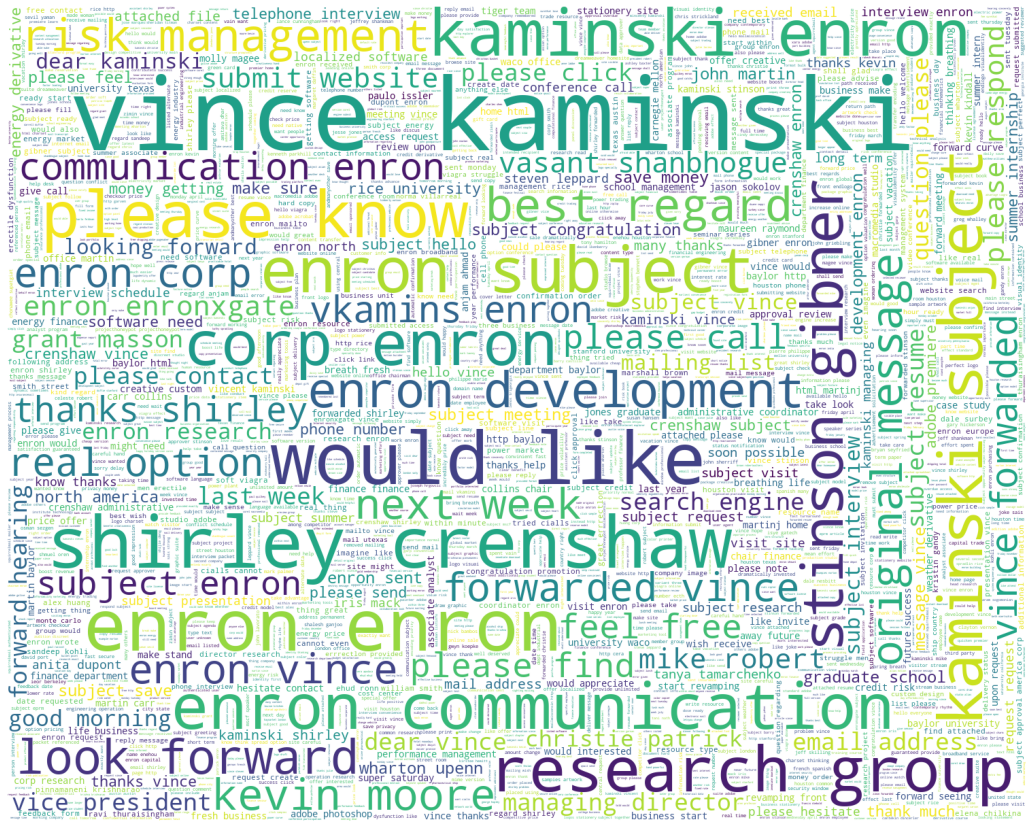

In [41]:
plt.figure(figsize=(28,15))
plt.imshow(w)
plt.axis('off')
plt.savefig('new.png')